In [29]:
import numpy as np
import pandas as pd

In [30]:
df_water = pd.read_csv('../water_potability.csv')

In [31]:
df_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [32]:
print('Sum of Null values:')
df_water.isna().sum()

Sum of Null values:


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [33]:
df_clean = df_water.fillna(df_water.mean())

In [34]:
print('Sum of Null values after cleaning:')
df_clean.isna().sum()

Sum of Null values after cleaning:


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [36]:
df_clean.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Feature Selection

<Axes: >

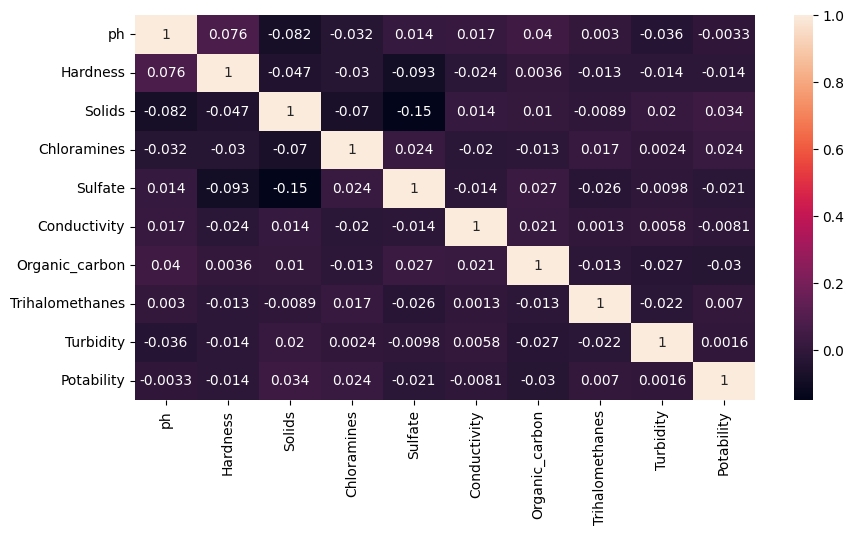

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
sns.heatmap(df_clean.corr(), annot = True)


In [46]:
col_list = list(df_clean.columns)[0: -1]

In [48]:
x = df_clean[col_list]

In [49]:
y = df_clean['Potability']

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [53]:
print('Training input:', x_train.shape)
print('Training output:', y_train.shape)
print('Testing input:', x_test.shape)
print('Testing output:', y_test.shape)

Training input: (2620, 9)
Training output: (2620,)
Testing input: (656, 9)
Testing output: (656,)


In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [55]:
model.fit(x_train, y_train)

C:\Users\kamra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [56]:
pred = model.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('Accuracy:',round(accuracy_score(y_test, pred) * 100))

Accuracy: 62


<Axes: >

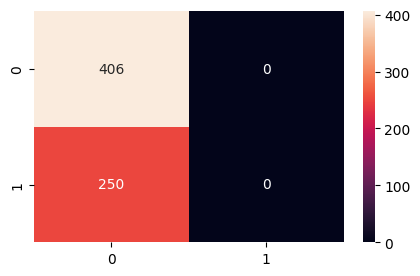

In [65]:
plt.figure(figsize = (5, 3))
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = '')

In [66]:
y_test.value_counts()

Potability
0    406
1    250
Name: count, dtype: int64

In [67]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(x_train, y_train)
pred2 = model2.predict(x_test)
print('Accuracy:',round(accuracy_score(y_test, pred2) * 100))

Accuracy: 69


<Axes: >

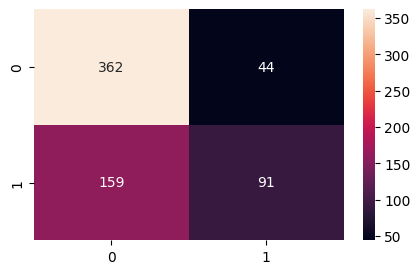

In [68]:
plt.figure(figsize = (5, 3))
sns.heatmap(confusion_matrix(y_test, pred2), annot = True, fmt = '')